1a)

Merry go round: Graph A
Solar system: Graph C

Graph A: v=cr
Graph B:|U| = 2K
        (3/5)(GM(r)m/r) = mv^2
        v = sqrt(3GM(r)/(5r))
Graph C:|U| = 2K
         (3/5)(GM(R)m/r) = mv^2
         v = sqrt(3GM(R)/(5r))
         M(R) is constant
Graph D:M(r) = (4/3)*pi*r^3*rho
               dm = 4*pi*rho*r^2
               rho ~ r^2
               integral(dm) = integral(4*pi*rho_0*r^4)
               M = (4/5)*pi*rho_0*r^5
               v^2 = (3/5)(G/r)(4*pi*rho_0*r^5/5)
               v = ((r^2)/5) * sqrt(12*G*pi*rho_0)


1b)

The bulge of a galaxy contains a large chunk of mass so the speed will increase rapidly as you move towards the through the bulge due to the virial theorem relation. The speed then remains around constant at the edge of the central bulge because of an invisible matter distribution that is present.

The majority of the mass is not located in the center, the mass is distributed with M(r) increasing at nearly the same rate as r is.

1c)

The mass distribution does not match the light rotation curve from the observable galaxy because the rotation curve shows a near steady speed after the edge of the bulge while the visible mass distribution curve does not show enough mass outside the edge of the bulge to keep up the speed.

In [6]:
text_file = open("velocity.dat", "r")
#lines = text_file.readlines()
lines = text_file.read().split(' ')
print lines
print len(lines)

text_file.close()

['2', '210\n2.5', '198\n3.5', '210\n4.5', '218\n5.5', '220\n6.7', '213\n7', '220\n7.5', '222\n9.5', '200\n10.3', '203\n11.5', '200\n12.5', '230\n13.3', '190\n14.5', '240\n15.5', '270\n16.5', '260\n17.5', '320\n18.5', '260\n']
19


[['2', '210'], ['2.5', '198'], ['3.5', '210'], ['4.5', '218'], ['5.5', '220'], ['6.7', '213'], ['7', '220'], ['7.5', '222'], ['9.5', '200'], ['10.3', '203'], ['11.5', '200'], ['12.5', '230'], ['13.3', '190'], ['14.5', '240'], ['15.5', '270'], ['16.5', '260'], ['17.5', '320'], ['18.5', '260']]


<function matplotlib.pyplot.show>

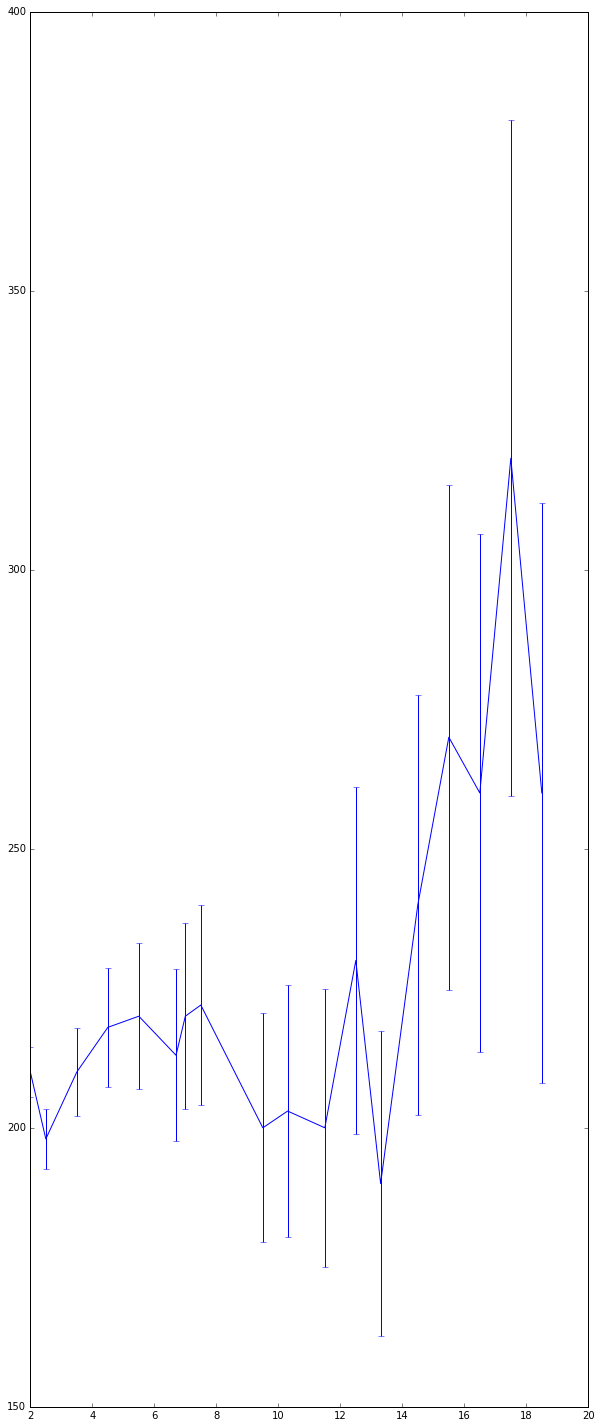

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open("velocity.dat") as textfile:
    lines = [line.split() for line in textfile]

print lines

radius = np.zeros(18)
velocity = np.zeros(18)
errors = np.zeros(18)

for i in range(0, 18):
    radius[i] = lines[i][0]
    velocity[i] = lines[i][1]
    errors[i] = velocity[i]*(radius[i]/18.5)*(.2)
    
#print radius
#print velocity
#print errors


fig = plt.figure(1, figsize=(10,25))
ax = fig.add_subplot(511)
ax.errorbar(radius,velocity, yerr = errors)
ax.set_xlabel('radius (kpc)')
ax.set_ylabel('speed (km/s)')
plt.show

<Container object of 3 artists>

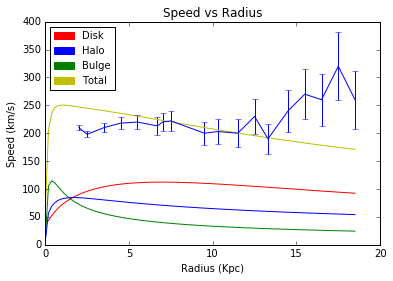

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches


Mb = 1.3*10**10
Md = 6.5*10**10
Mh = 10**9

def rhob(m,r):
    a = 0.4 *3.086*10**19
    rho = (m / ( (4*np.pi*a**3))) * (1+((r/a)**2))**(-2.5) 
    return rho

def rhoh(m,r):
    a = 0.5 *3.086*10**19
    rho = m*(((2*10**9))) * (a + r)**(-3.1)
    return rho

def sigma(m,r):
    a = 4.0 *3.086*10**19
    sigma = (m/(2*np.pi*(a**2))) * (np.exp(-r/a))
    return sigma

def dmdrb(m,r):
    r = r * 3.086*10**19
    m = m * 2*10**30
    dmdr = 4*np.pi*((r)**2)*rhob(m,r)
    return dmdr

def dmdrh(m,r):
    r = r * 3.086*10**19
    m = m * 2*10**30
    dmdr = 4*np.pi*((r)**2)*rhoh(m,r)
    return dmdr

def dmdrd(m,r):
    r = r * 3.086*10**19
    m = m * 2*10**30
    dmdr = 2*np.pi*(r)*sigma(m,r)
    return dmdr

r = np.linspace(0.001, 18.5, 100)

# for disk

def dmd(r):
    dmd = dmdrd(Md,r)*(18.5/100)
    return dmd

dmD = np.zeros(100)

for i in range(100):
    if i == 0:
        dmD[i] = dmd(r[i])
    else:
        dmD[i] += dmD[i-1]+dmd(r[i])

vel2 = np.zeros(100)
veld = np.zeros(100)
    
for i in range(100):
    vel2[i] = 3*6.67*10**(-11)*dmD[i]/(5 * r[i])
    veld[i] = (np.sqrt(vel2[i]))
    
# for bulge

def dmb(r):
    dmb = dmdrb(Mb,r)*(18.5/100)
    return dmb

dmB = np.zeros(100)

for i in range(100):
    if i == 0:
        dmB[i] = dmb(r[i])
    else:
        dmB[i] += dmB[i-1]+dmb(r[i])

vel2 = np.zeros(100)
velb = np.zeros(100)
    
for i in range(100):
    vel2[i] = 3*6.67*10**(-11)*dmB[i]/(5 * r[i])
    velb[i] = (np.sqrt(vel2[i]))
    
#for halo

def dmh(r):
    dmh = dmdrh(Mh,r)*(18.5/100)
    return dmh

dmH = np.zeros(100)

for i in range(100):
    if i == 0:
        dmH[i] = dmh(r[i])
    else:
        dmH[i] += dmH[i-1]+dmh(r[i])

vel2 = np.zeros(100)
velh = np.zeros(100)
    
for i in range(100):
    vel2[i] = 3*6.67*10**(-11)*dmH[i]/(5 * r[i])
    velh[i] = (np.sqrt(vel2[i]))/5000


# for the total

def dmtot(r):
    dmbulge = dmdrb(Mb,r)
    dmhalo = dmdrh(Mh,r)
    dmdisk = dmdrd(Md,r)
    dmtot = (dmbulge + dmhalo + dmdisk)*(18.5/100)
    return dmtot

#result1 = np.zeros(100)

result1 = [dmtot(r[x]) for x in range(100)]

for i in range(100):
    if i == 0:
        result1[i] = dmtot(r[i])
    else:
        result1[i] += result1[i-1]+dmtot(r[i])
    
#print result1

#vel2 = np.zeros(100)
vel = np.zeros(100)
    
for i in range(100):
    #vel2[i] = 3*6.67*10**(-11)*result1[i]/(5 * r[i])
    #vel[i] = (np.sqrt(vel2[i]))/100
    vel[i] = veld[i] + velb[i] + velh[i]
    
plt.plot(r, vel/1000, 'y')
plt.plot(r, veld/1000, 'r')
plt.plot(r, velb/1000, 'g')
plt.plot(r, velh/1000, 'b')
plt.xlabel('Radius (Kpc)')
plt.ylabel('Speed (km/s)')

red_patch = mpatches.Patch(color='r', label='Disk')
blue_patch = mpatches.Patch(color='b', label='Halo')
green_patch = mpatches.Patch(color='g', label='Bulge')
yellow_patch = mpatches.Patch(color='y', label='Total')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch], loc = 2, prop={'size':10})
plt.title('Speed vs Radius')

plt.errorbar(radius,velocity, yerr = errors)

2c)

The velocity does not match the data, there is missing matter in the form of dark matter causing the speed to increase towards the edge of the bulge and into the disk.

<Container object of 3 artists>

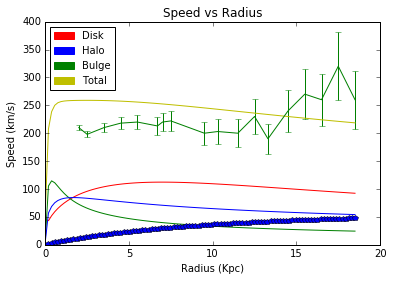

In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches


Mb = 1.3*10**10
Md = 6.5*10**10
Mh = 10**9

def rhob(m,r):
    a = 0.4 *3.086*10**19
    rho = (m / ( (4*np.pi*a**3))) * (1+((r/a)**2))**(-2.5) 
    return rho

def rhoh(m,r):
    a = 0.5 *3.086*10**19
    rho = m*(((2*10**9))) * (a + r)**(-3.1)
    return rho

def sigma(m,r):
    a = 4.0 *3.086*10**19
    sigma = (m/(2*np.pi*(a**2))) * (np.exp(-r/a))
    return sigma

def dmdrb(m,r):
    r = r * 3.086*10**19
    m = m * 2*10**30
    dmdr = 4*np.pi*((r)**2)*rhob(m,r)
    return dmdr

def dmdrh(m,r):
    r = r * 3.086*10**19
    m = m * 2*10**30
    dmdr = 4*np.pi*((r)**2)*rhoh(m,r)
    return dmdr

def dmdrd(m,r):
    r = r * 3.086*10**19
    m = m * 2*10**30
    dmdr = 2*np.pi*(r)*sigma(m,r)
    return dmdr

r = np.linspace(0.001, 18.5, 100)

# for disk

def dmd(r):
    dmd = dmdrd(Md,r)*(18.5/100)
    return dmd

dmD = np.zeros(100)

for i in range(100):
    if i == 0:
        dmD[i] = dmd(r[i])
    else:
        dmD[i] += dmD[i-1]+dmd(r[i])

vel2 = np.zeros(100)
veld = np.zeros(100)
    
for i in range(100):
    vel2[i] = 3*6.67*10**(-11)*dmD[i]/(5 * r[i])
    veld[i] = (np.sqrt(vel2[i]))
    
# for bulge

def dmb(r):
    dmb = dmdrb(Mb,r)*(18.5/100)
    return dmb

dmB = np.zeros(100)

for i in range(100):
    if i == 0:
        dmB[i] = dmb(r[i])
    else:
        dmB[i] += dmB[i-1]+dmb(r[i])

vel2 = np.zeros(100)
velb = np.zeros(100)
    
for i in range(100):
    vel2[i] = 3*6.67*10**(-11)*dmB[i]/(5 * r[i])
    velb[i] = (np.sqrt(vel2[i]))
    
#for halo

def dmh(r):
    dmh = dmdrh(Mh,r)*(18.5/100)
    return dmh

dmH = np.zeros(100)

for i in range(100):
    if i == 0:
        dmH[i] = dmh(r[i])
    else:
        dmH[i] += dmH[i-1]+dmh(r[i])

vel2 = np.zeros(100)
velh = np.zeros(100)
    
for i in range(100):
    vel2[i] = 3*6.67*10**(-11)*dmH[i]/(5 * r[i])
    velh[i] = (np.sqrt(vel2[i]))/5000

#
#
# new stuff for second halo
#
#

Mdm = 9*10**8

def rhodm(m,r):
    a = 16 *3.086*10**19
    rho = m*(((2*10**9))) * (a + r)**(-3.1)
    return rho

def dmdm(m,r):
    r = r * 3.086*10**19
    m = m * 2*10**30
    dmdr = 4*np.pi*((r)**2)*rhodm(m,r)
    return dmdr
    
def dmdark(r):
    dmdark = dmdm(Mdm,r)*(18.5/100)
    return dmdark

dmDM = np.zeros(100)

for i in range(100):
    if i == 0:
        dmDM[i] = dmdark(r[i])
    else:
        dmDM[i] += dmDM[i-1]+dmdark(r[i])

vel2 = np.zeros(100)
veldm = np.zeros(100)
    
for i in range(100):
    vel2[i] = 3*6.67*10**(-11)*dmDM[i]/(5 * r[i])
    veldm[i] = (np.sqrt(vel2[i]))/1000
    
    
# for the total

def dmtot(r):
    dmbulge = dmdrb(Mb,r)
    dmhalo = dmdrh(Mh,r)
    dmdisk = dmdrd(Md,r)
    dmdark = dmdm(Mdm,r)
    dmtot = (dmbulge + dmhalo + dmdisk + dmdark)*(18.5/100)
    return dmtot

#result1 = np.zeros(100)

result1 = [dmtot(r[x]) for x in range(100)]

for i in range(100):
    if i == 0:
        result1[i] = dmtot(r[i])
    else:
        result1[i] += result1[i-1]+dmtot(r[i])
    
#print result1

#vel2 = np.zeros(100)
vel = np.zeros(100)
    
for i in range(100):
    #vel2[i] = 3*6.67*10**(-11)*result1[i]/(5 * r[i])
    #vel[i] = (np.sqrt(vel2[i]))/100
    vel[i] = veld[i] + velb[i] + velh[i] + veldm[i]
    
plt.plot(r, vel/1000, 'y')
plt.plot(r, veld/1000, 'r')
plt.plot(r, velb/1000, 'g')
plt.plot(r, velh/1000, 'b')
plt.plot(r, veldm/1000, 'p')
plt.xlabel('Radius (Kpc)')
plt.ylabel('Speed (km/s)')

red_patch = mpatches.Patch(color='r', label='Disk')
blue_patch = mpatches.Patch(color='b', label='Halo')
green_patch = mpatches.Patch(color='g', label='Bulge')
yellow_patch = mpatches.Patch(color='y', label='Total')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch], loc = 2, prop={'size':10})
plt.title('Speed vs Radius')

plt.errorbar(radius,velocity, yerr = errors)

2d)

There should be a second halo with a mass of 9*10^8 solar masses and a scale length of 16kpc.
The plummer sphere with a different exponent might work as a better approximation.